In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from statsmodels.stats import diagnostic
from scipy import stats
from datetime import datetime
import time
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
%reload_ext autoreload

In [5]:
#import functions
from read.read_functions import *
from read.pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

from cleaning_functions.matched_beer import *
from cleaning_functions.rate_beer import *
from cleaning_functions.advocate import *

from compute_experts import *

In [6]:
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'


In [7]:
beer_advocate_path = '../datas/BeerAdvocate/pickle/'
matched_beer_data_path = '../datas/matched_beer_data/pickle'
rate_beer_path = '../datas/RateBeer/pickle'

advocate_beers_path_pickle = beer_advocate_path + 'beers.csv'
advovate_breweries_path_pickle = beer_advocate_path + 'breweries.csv'
advocate_ratings_path_pickle = beer_advocate_path + 'ratings.txt'
advocate_reviews_path_pickle = beer_advocate_path + 'reviews.txt'
advocate_users_path_pickle = beer_advocate_path + 'users.csv'

matched_beer_beers_pickle = matched_beer_data_path + 'beers.csv'
matched_beer_breweries_pickle = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba_pickle = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb_pickle = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings_pickle = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx_pickle = matched_beer_data_path + 'users_approx.csv'
matched_beer_users_pickle = matched_beer_data_path + 'users.csv'

rate_beer_beers_pickle = rate_beer_path + 'beers.csv'
rate_beer_breweries_pickle = rate_beer_path + 'breweries.csv'
rate_beer_users_pickle = rate_beer_path + 'users.csv'

In [8]:
#Define list of datas for each website
datas_matched_beer_names = ['df_matched_beer_beers','df_matched_beer_breweries','df_matched_beer_ratings_ba','df_matched_beer_ratings_rb','df_matched_beer_ratings','df_matched_beer_users_approx','df_matched_beer_users']
datas_advocate_names = ['df_advocate_beers','df_advocate_breweries','df_advocate_ratings','df_advocate_reviews','df_advocate_users']
datas_rate_beer_names = ['df_rate_beer_beers','df_rate_beer_breweries','df_rate_beer_users','df_rate_beer_ratings','df_rate_beer_ratings']
data_merge = ['df_all_users', 'df_ratings_stat_sampled', 'df_ratings_stat']

### Import datas stored as pickle

In [7]:
df_matched_beer_beers, df_matched_beer_breweries, df_matched_beer_ratings_ba, df_matched_beer_ratings_rb, df_matched_beer_ratings, df_matched_beer_users_approx, df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_rate_beer_beers, df_rate_beer_breweries, df_rate_beer_users, df_rate_beer_ratings, df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)
df_advocate_beers, df_advocate_breweries, df_advocate_ratings, df_advocate_reviews, df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...
Loading df_rate_beer_ratings...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...


In [9]:
# open merge datasets
df_all_users, df_ratings_stat_sampled, df_ratings_stat = load_datas('Results', data_merge)

Loading df_all_users...
Loading df_ratings_stat_sampled...
Loading df_ratings_stat...


In [9]:
df_all_users.head()

,ba_user_name,rb_user_name,user_id,location,joined
0,nmann08,nmann08,nmann08.184925,"United States, Washington",2008-01-07 11:00:00
1,StJamesGate,NaN,stjamesgate.163714,"United States, New York",2007-10-08 10:00:00
2,mdagnew,NaN,mdagnew.19527,Northern Ireland,2005-05-18 10:00:00
3,helloloser12345,NaN,helloloser12345.10867,Northern Ireland,2004-11-25 11:00:00
4,cypressbob,NaN,cypressbob.3708,Northern Ireland,2003-11-20 11:00:00


In [10]:
df_ratings_stat.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,ba_user_name,user_id,appearance,aroma,palate,taste,overall,rating,rb_user_name,location,joined,year
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 10:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,nmann08,"United States, Washington",2008-01-07 11:00:00,2015
1,O-Ho-Ho,120824,Otley Brewing Company,13092,Extra Special / Strong Bitter (ESB),5.0,2015-11-14 11:00:00,nmann08,nmann08.184925,4.00,3.50,3.75,3.50,3.50,3.56,nmann08,"United States, Washington",2008-01-07 11:00:00,2015
2,Ola Dubh Special Reserve 18,47581,Harviestoun Brewery Ltd.,323,Old Ale,8.0,2011-11-18 11:00:00,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,4.50,nmann08,"United States, Washington",2008-01-07 11:00:00,2011
3,Ola Dubh Special Reserve 21,93113,Harviestoun Brewery Ltd.,323,Old Ale,10.5,2013-05-03 10:00:00,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,3.75,nmann08,"United States, Washington",2008-01-07 11:00:00,2013
4,Old Engine Oil Black Ale,875,Harviestoun Brewery Ltd.,323,English Porter,6.0,2015-01-24 11:00:00,nmann08,nmann08.184925,4.00,3.50,3.75,4.00,3.75,3.81,nmann08,"United States, Washington",2008-01-07 11:00:00,2015


###  Compute is_expert dataframe

In [10]:
df_ratings_stat_expert, df_ratings_stat_pivot = compute_experts_table(df_ratings_stat)
df_ratings_stat_expert.head()

ok


,user_id,year,nb_ratings,is_expert
0,2,2000,44,False
1,2,2001,4,False
2,2,2002,1,False
3,3,2000,94,False
4,3,2001,69,False


In [9]:
df_ratings_stat_expert.groupby('year').apply(lambda x: sum(x['is_expert']))

year
1996      0
1998      1
1999      1
2000      1
2001      6
2002     16
2003     25
2004     36
2005     51
2006     68
2007     92
2008    118
2009    141
2010    166
2011    210
2012    314
2013    412
2014    660
2015    764
2016    749
2017    690
dtype: int64

## Analysis 

## 2. a)

In [16]:
avg_ratings_expert = []
avg_ratings_normal = []
ttest_expert_normal = []

interest_years = sorted([year for year in df_ratings_stat.year.unique() if year > 2002])

for year in interest_years:
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stat.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    avg_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    avg_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    t_stat, p_val = stats.ttest_ind(df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'], df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'])
    ttest_expert_normal.append(t_stat)
    print(f'Ttest: Do the ratings of casual and expert are the same in {year} ? p-value = {p_val}, stat = {t_stat}')
    avg_ratings_expert.append(avg_expert)
    avg_ratings_normal.append(avg_normal)

Ttest: Do the ratings of casual and expert are the same in 2003 ? p-value = 3.555338170625793e-157, stat = -26.741332046705867
Ttest: Do the ratings of casual and expert are the same in 2004 ? p-value = 0.0, stat = -65.03723485748407
Ttest: Do the ratings of casual and expert are the same in 2005 ? p-value = 0.0, stat = -97.14278244806339
Ttest: Do the ratings of casual and expert are the same in 2006 ? p-value = 0.0, stat = -108.4939162445685
Ttest: Do the ratings of casual and expert are the same in 2007 ? p-value = 0.0, stat = -111.04917004040455
Ttest: Do the ratings of casual and expert are the same in 2008 ? p-value = 0.0, stat = -139.67452273606656
Ttest: Do the ratings of casual and expert are the same in 2009 ? p-value = 0.0, stat = -176.38197045250197
Ttest: Do the ratings of casual and expert are the same in 2010 ? p-value = 0.0, stat = -163.63059512592906
Ttest: Do the ratings of casual and expert are the same in 2011 ? p-value = 0.0, stat = -211.80095314019337
Ttest: Do th

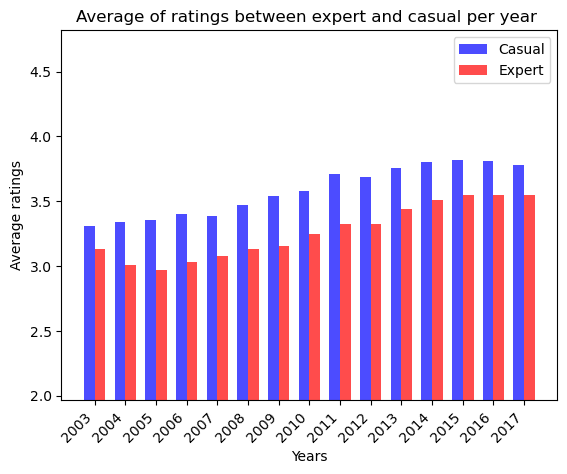

In [15]:
bar_width = 0.35
fig, ax = plt.subplots()

bar_positions1 = np.arange(len(avg_ratings_expert))
bar_positions2 = bar_positions1 + bar_width

ax.bar(bar_positions1, avg_ratings_normal, width=bar_width, label='Casual', color='blue', alpha=0.7)
ax.bar(bar_positions2, avg_ratings_expert, width=bar_width, label='Expert', color='red', alpha=0.7)

ax.set_xlabel('Years')
ax.set_ylabel('Average ratings')
ax.set_title('Average of ratings between expert and casual per year ')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(interest_years, rotation=45, ha='right')

y_min = min(min(avg_ratings_normal), min(avg_ratings_expert)) - 1 
y_max = max(max(avg_ratings_normal), max(avg_ratings_expert)) + 1 
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

The plot shows that the user considered as expert tend to be more severe concerning the global rating of a beer.

## 2. g)

In [11]:
df_ratings_stat["is_expert"]=df_ratings_stat[["user_id","year"]].apply(lambda x: 1 if df_ratings_stat_pivot[x["year"]][x["user_id"]] else 0, axis=1)

In [52]:
# Add a new column 'group_size' to the DataFrame, representing the size of each group defined by 'beer_id', 'year', and 'is_expert'
df_ratings_stat['group_size'] = df_ratings_stat.groupby(['beer_id', 'year', 'is_expert'])['rating'].transform('size')

# In order to build confident intervals we need at least 10 ratings per beer
df_ratings_stat_filtered = df_ratings_stat[df_ratings_stat['group_size'] >= 10].drop(columns='group_size')

# Calculate the number of rows with is_expert = 1 for each beer_id
expert_counts = df_ratings_stat_filtered[df_ratings_stat_filtered['is_expert'] == 1].groupby('beer_id')['is_expert'].sum()

# Sort the results in descending order and select the top 16
top_beer_ids = expert_counts.sort_values(ascending=False).head(16).index.tolist()

result_df = df_ratings_stat_filtered[df_ratings_stat_filtered['beer_id'].isin(top_beer_ids)][['beer_id', 'beer_name']].drop_duplicates(subset=['beer_id'])

beer_ids_to_study, beer_names_to_study = result_df['beer_id'].to_list(), result_df['beer_name'].to_list()

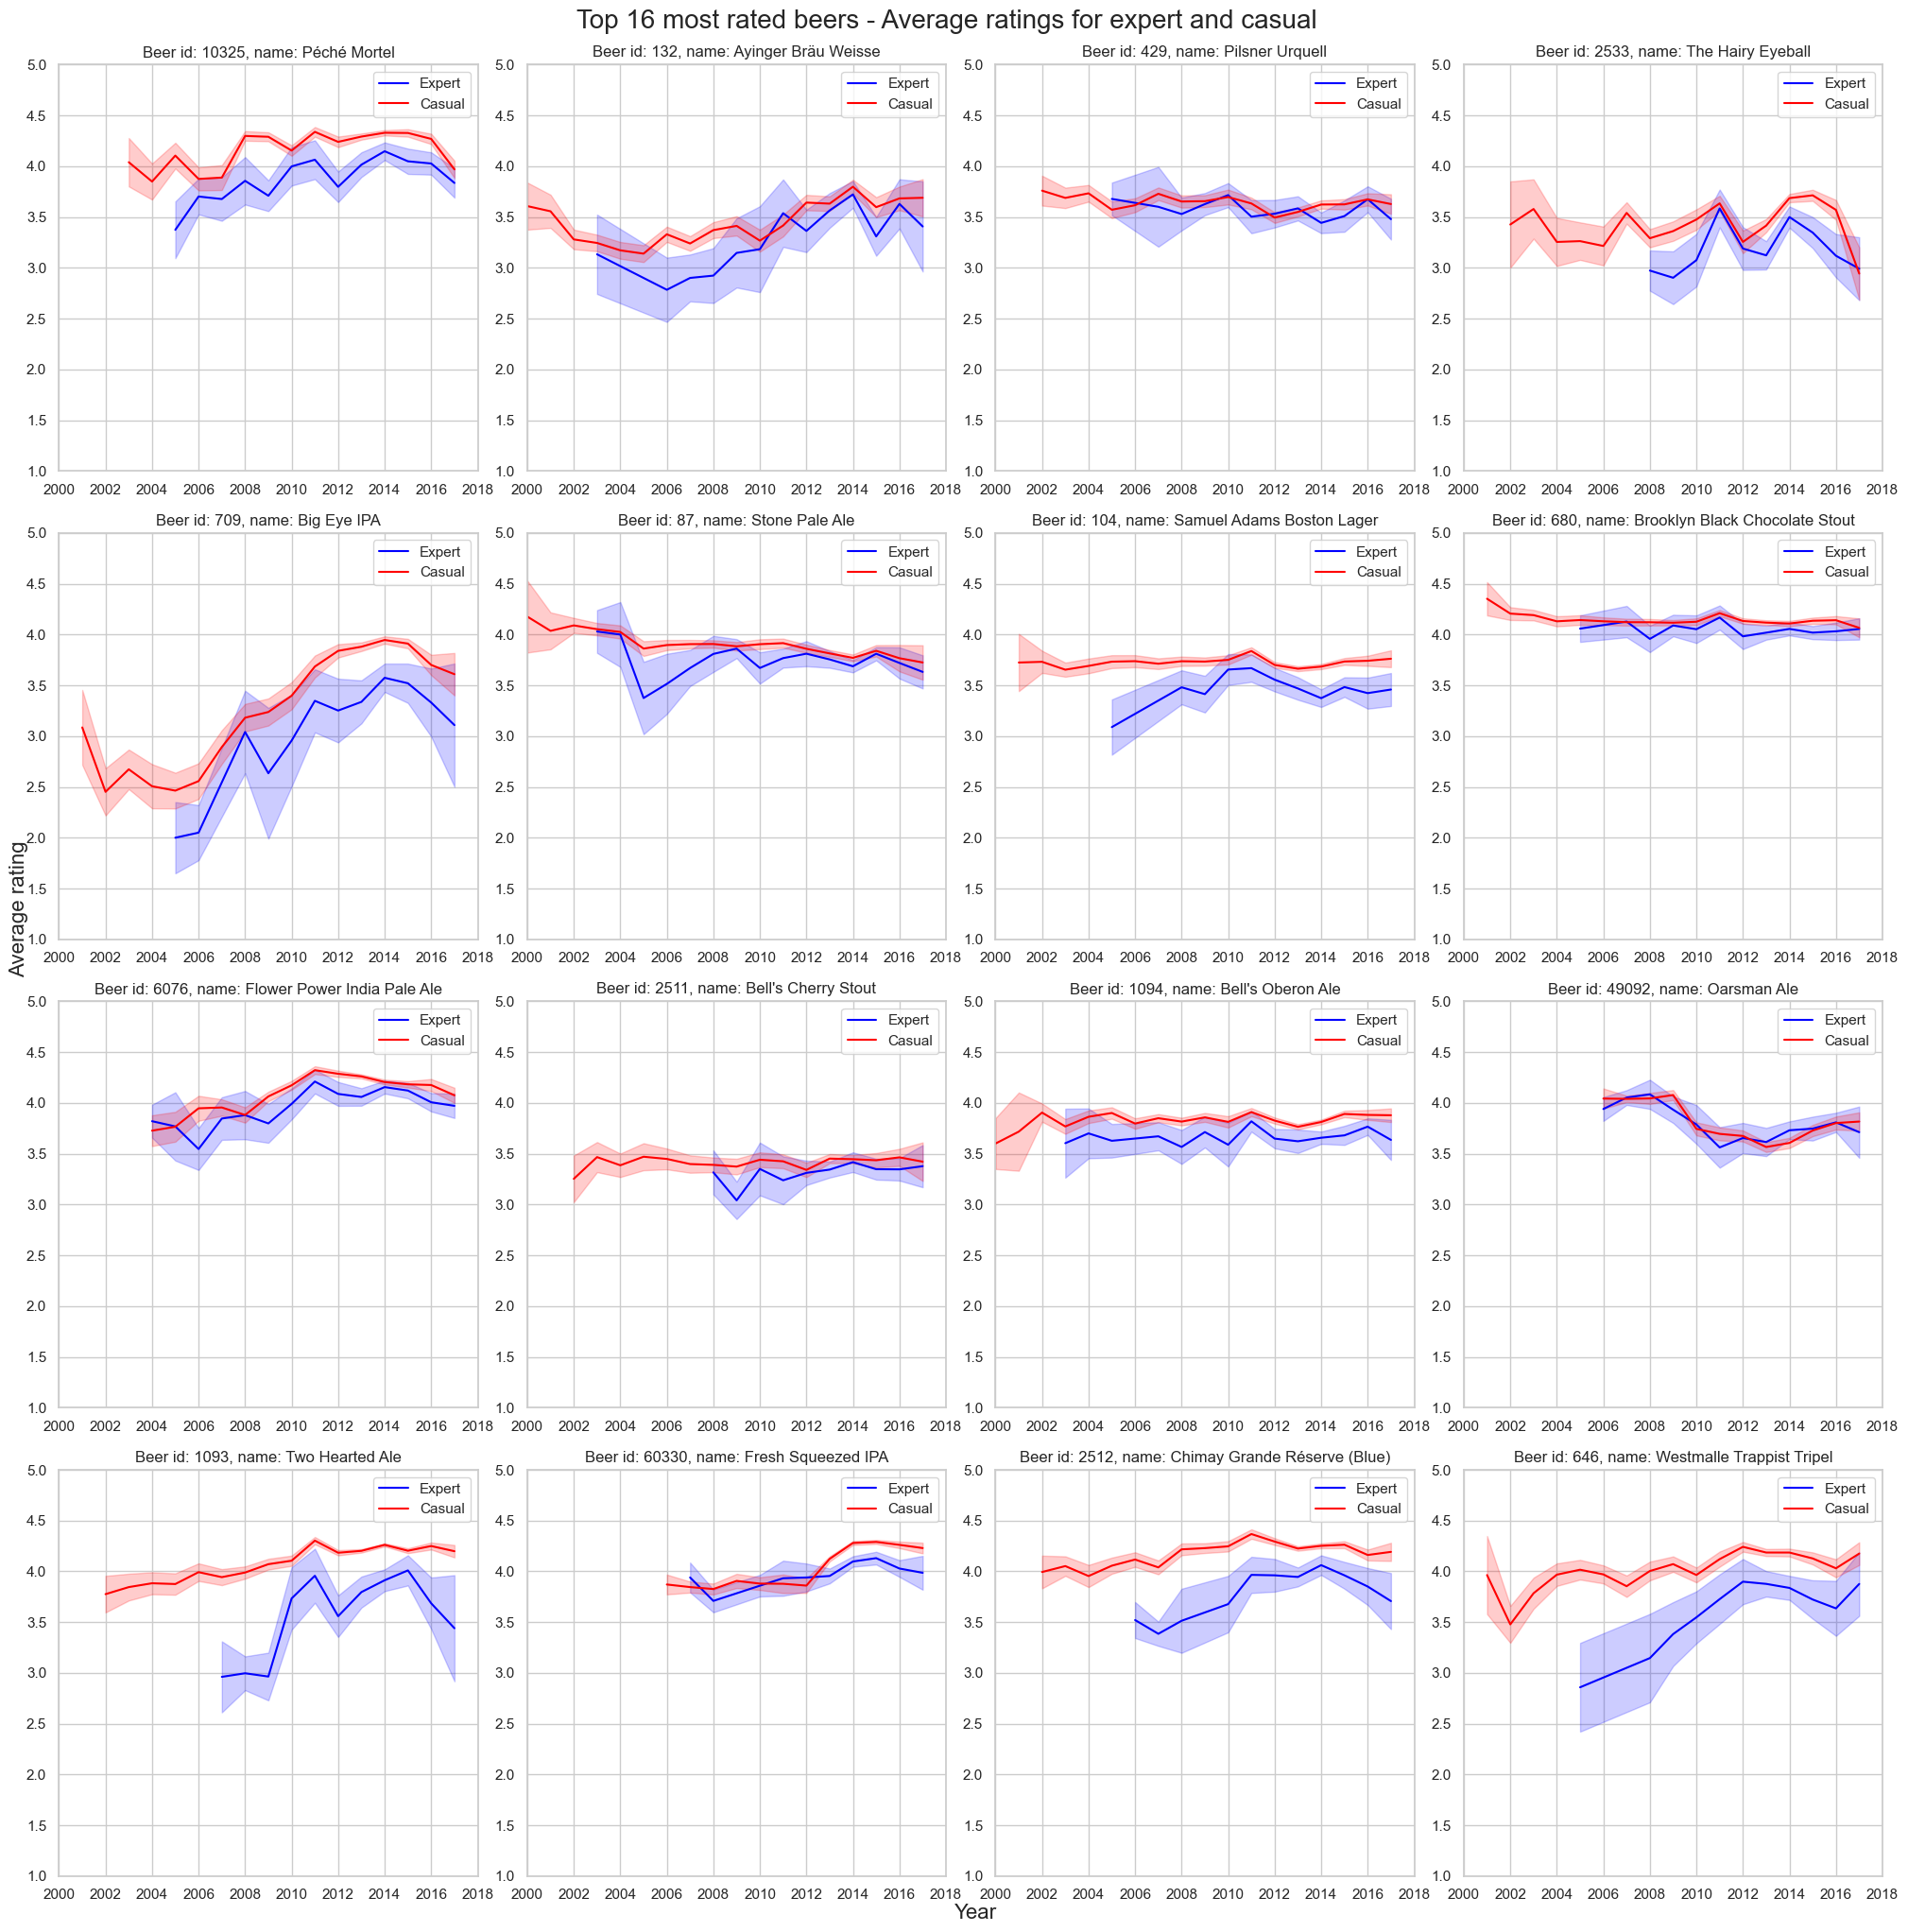

In [54]:
# beer_ids_to_study, beer_names_to_study = zip(*df_ratings_stat_filtered[['beer_id', 'beer_name']].value_counts()[:16].index)

# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the 2D array of axes to iterate over it easily
axes = axes.flatten()

# Iterate over beer_ids and corresponding subplots
for i, (beer_id_to_study, beer_name_to_study) in enumerate(zip(beer_ids_to_study, beer_names_to_study)):
    # Select ratings for the current beer_id
    ratings_this_beer = df_ratings_stat_filtered.loc[df_ratings_stat_filtered["beer_id"] == beer_id_to_study]
    # Expert CI
    ratings_this_beer_experts = ratings_this_beer[ratings_this_beer['is_expert'] == 1]
    ratings_this_beer_experts = ratings_this_beer_experts.groupby(["year"])["rating"].agg(["std","mean","count"]).reset_index()
    ratings_this_beer_experts['CI95_up'] = ratings_this_beer_experts.apply(lambda x: x["mean"] + 1.96 * x["std"] / np.sqrt(x["count"]), axis=1)
    ratings_this_beer_experts['CI95_down'] = ratings_this_beer_experts.apply(lambda x: x["mean"] - 1.96 * x["std"] / np.sqrt(x["count"]), axis=1) 
    # Casual CI
    ratings_this_beer_casuals = ratings_this_beer[ratings_this_beer['is_expert'] == 0]
    ratings_this_beer_casuals = ratings_this_beer_casuals.groupby(["year"])["rating"].agg(["std","mean","count"]).reset_index()
    ratings_this_beer_casuals['CI95_up'] = ratings_this_beer_casuals.apply(lambda x: x["mean"] + 1.96 * x["std"] / np.sqrt(x["count"]), axis=1)
    ratings_this_beer_casuals['CI95_down'] = ratings_this_beer_casuals.apply(lambda x: x["mean"] - 1.96 * x["std"] / np.sqrt(x["count"]), axis=1) 
    # Plot on the current subplot
    lineplot_expert = sns.lineplot(data=ratings_this_beer_experts, x='year', y='mean', label='Expert', ax=axes[i], color='blue')
    lineplot_casual = sns.lineplot(data=ratings_this_beer_casuals, x='year', y='mean', label='Casual', ax=axes[i], color='red')
    
    # Fill between the confidence intervals
    axes[i].fill_between(ratings_this_beer_experts['year'], ratings_this_beer_experts['CI95_down'], ratings_this_beer_experts['CI95_up'], 
                         color='blue', alpha=0.2)

    axes[i].fill_between(ratings_this_beer_casuals['year'], ratings_this_beer_casuals['CI95_down'], ratings_this_beer_casuals['CI95_up'], 
                         color='red', alpha=0.2)

    axes[i].set(xlabel=None, ylabel=None)
    axes[i].set_title(f'Beer id: {beer_id_to_study}, name: {beer_name_to_study}')

for ax in axes:
    ax.set_xlim(2000, 2018)
    ax.set_ylim(1, 5)  

sns.set(style="whitegrid")
fig.text(0.5,0, "Year", fontsize=16)
fig.text(0,0.5, "Average rating", rotation = 90, fontsize=16)
fig.text(0.3, 1, 'Top 16 most rated beers by expert - Average ratings for expert and casual', fontsize=20)
# Adjust layout to prevent overlapping
plt.legend()
plt.tight_layout()
plt.show()

In the top 16 most rated beers, the plots illustrate that the expert ratings fluctuate more (confident interval are much bigger) than the ratings of the casuals , which tend to be more stable. We can also notice that the blue curve of is almost everytime below the red one, which means that the expert are more likely to be more strict about the grade of a beer. Another point is that the tend to start giving rating after the casual ones and initially give a grade which is much smaller than casual. However, the ratings of expert and casual tend to be much more closer to each other over the years.